In [58]:
import folium
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


In [59]:
shibuya_gvi = gpd.read_file("/workspace/app/Green-View-Index/shibuya/shibuya_gvi/shibuya_gvi.shp")
tokuyama_gvi = gpd.read_file("/workspace/app/Green-View-Index/tokuyama/tokuyama_gvi/tokuyama_gvi.shp")

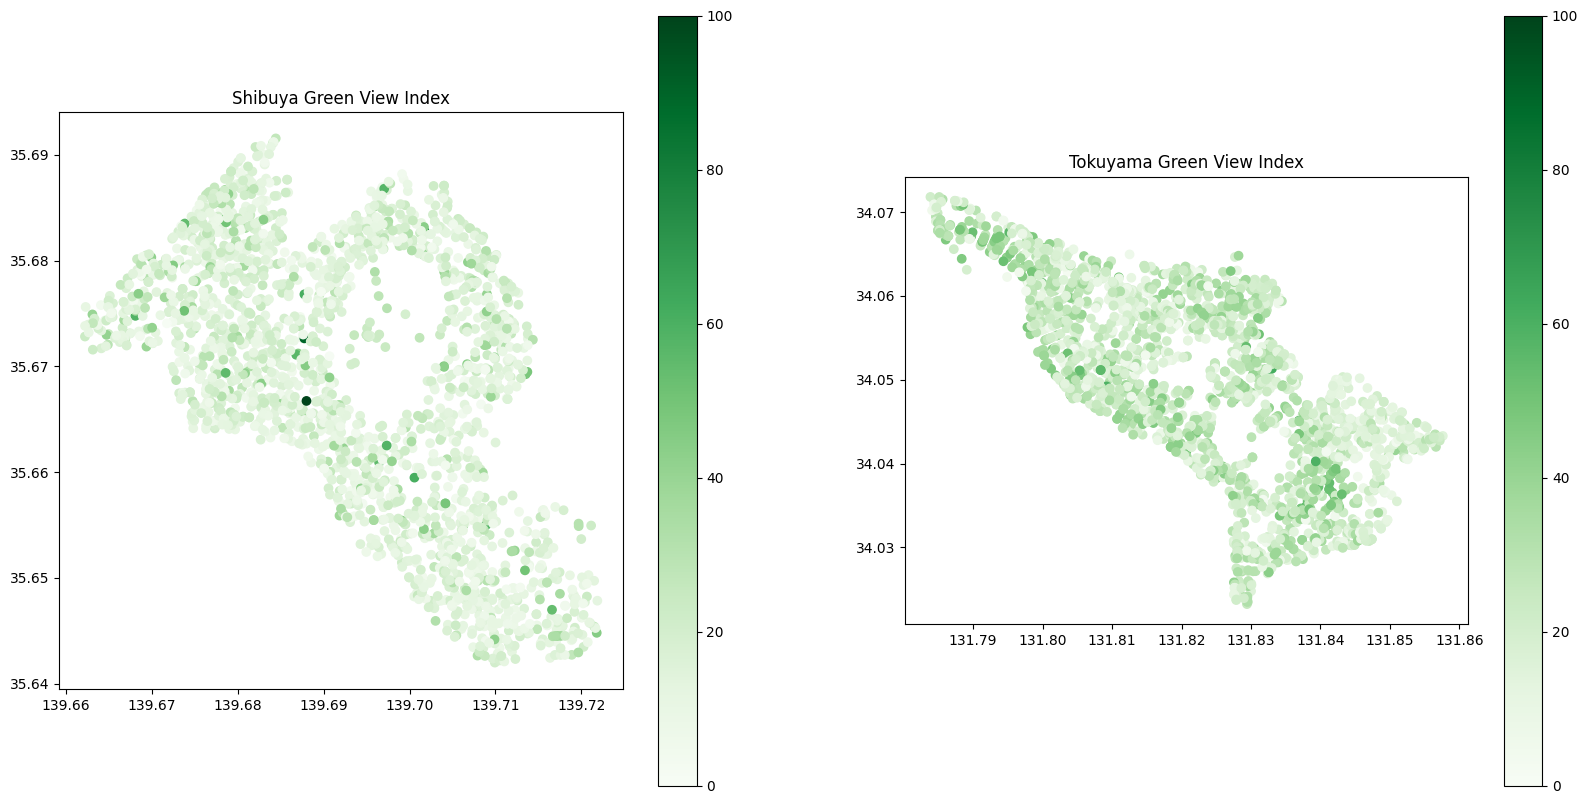

In [60]:
# Plotting the Green View Index with the same color range
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Shibuya GVI
ax[0].set_title("Shibuya Green View Index")
shibuya_gvi.plot(column="gvi", cmap="Greens", ax=ax[0], legend=True, vmin=0, vmax=100)

# Tokuyama GVI
ax[1].set_title("Tokuyama Green View Index")
tokuyama_gvi.plot(column="gvi", cmap="Greens", ax=ax[1], legend=True, vmin=0, vmax=100)

plt.show()

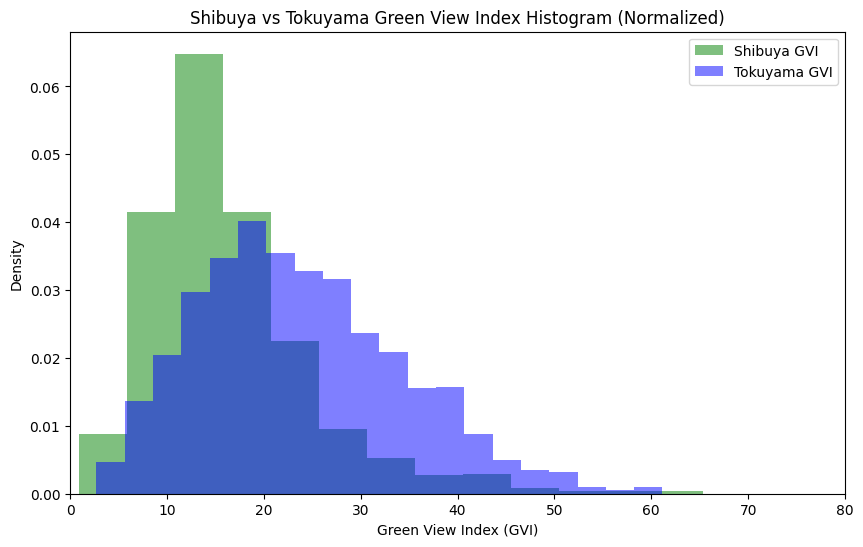

In [61]:
# 同じaxで2つのヒストグラムを重ねる
fig, ax = plt.subplots(figsize=(10, 6))

# Shibuyaのヒストグラム（density=Trueで割合を表示）
shibuya_gvi["gvi"].plot.hist(ax=ax, bins=20, color="green", alpha=0.5, label="Shibuya GVI", density=True)

# Tokuyamaのヒストグラム（density=Trueで割合を表示）
tokuyama_gvi["gvi"].plot.hist(ax=ax, bins=20, color="blue", alpha=0.5, label="Tokuyama GVI", density=True)

# グラフのタイトルとラベル
ax.set_title("Shibuya vs Tokuyama Green View Index Histogram (Normalized)")
ax.set_xlabel("Green View Index (GVI)")
ax.set_ylabel("Density")

# x軸の範囲を0-100に制限
ax.set_xlim(0, 80)

# 凡例を表示
ax.legend()

# グラフを表示
plt.show()

In [62]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors


# def gvi_to_color(gvi):
#     """
#     GVIの値を色にマッピングする関数。
#     GVIが30を超えると青緑色、15以下は茶色、
#     15から30の間はグラデーションで色を決定します。
#     """
#     # 正規化：GVIの値を0から1の範囲にスケーリング
#     norm = mcolors.Normalize(vmin=0, vmax=100)

#     # カラーマップを作成
#     # 0-15: 茶色 (saddlebrown), 15-30: 緑へのグラデーション, 30+: 青緑色 (teal)
#     cmap = mcolors.LinearSegmentedColormap.from_list(
#         "BrownGreenTeal",
#         [(0.0, "saddlebrown"), (0.15, "saddlebrown"), (0.3, "green"), (1.0, "teal")],  # 0  # 15  # 30  # 100
#     )

#     # GVIの値をカラーにマッピング
#     rgba_color = cmap(norm(gvi))
#     # RGBA値を16進カラーコードに変換
#     hex_color = mcolors.to_hex(rgba_color)
#     return hex_color

In [63]:
import matplotlib.colors as mcolors


def gvi_to_color(gvi):
    """
    GVIの値を色にマッピングする関数。
    0が茶色、60が緑、60以上が青緑になるように色を決定します。
    """
    # 正規化：GVIの値を0から1の範囲にスケーリング
    norm = mcolors.Normalize(vmin=0, vmax=100)

    # カラーマップを作成（0が茶色、60が緑、60以上が青緑）
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "CustomBrownGreenTeal",
        [
            (0.0, "#8B4513"),
            (0.3, "#9ACD32"),
            (0.6, "#66CDAA"),
            (1, "#66CDAA"),
        ], 
    )

    # GVIの値をカラーにマッピング
    rgba_color = cmap(norm(gvi))
    # RGBA値を16進カラーコードに変換
    hex_color = mcolors.to_hex(rgba_color)
    return hex_color

In [67]:
# カラーマップの表示
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# カラーマップを作成（0が茶色、60が緑、60以上が青緑）
cmap = mcolors.LinearSegmentedColormap.from_list(
    "CustomBrownGreenTeal",
    [
        (0.0, "#8B4513"),
        (0.3, "#9ACD32"),
        (0.6, "#66CDAA"),
        (1, "#66CDAA"),
    ], 
)

# カラーバーを表示
norm = mcolors.Normalize(vmin=0, vmax=100)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation="horizontal")
cb.set_label("Green View Index (GVI)")

plt.show()

IndentationError: unexpected indent (3990402671.py, line 6)

In [64]:
# 中心座標をデータの中心に設定
map_center = [tokuyama_gvi.geometry.y.mean(), tokuyama_gvi.geometry.x.mean()]
# Foliumマップを作成
m = folium.Map(location=map_center, zoom_start=15, tiles="cartodbdark_matter")

# データフレームをループして各ポイントを追加
for idx, row in tokuyama_gvi.iterrows():
    gvi_value = row["gvi"]
    # GVIの値がNaNの場合はスキップ
    if pd.isna(gvi_value):
        continue
    # GVIの値を色にマッピング
    color = gvi_to_color(gvi_value)
    # ポイントの座標を取得
    lat = row.geometry.y
    lon = row.geometry.x
    # FoliumのCircleを追加
    folium.Circle(
        location=[lat, lon],
        radius=20,  # 半径を適宜調整
        color=color,
        fill=True,
        stroke=False,
        fill_color=color,
        fill_opacity=1,
        popup=f"GVI: {gvi_value:.2f}",
    ).add_to(m)

# マップを表示
m

In [65]:
# 中心座標をデータの中心に設定
map_center = [shibuya_gvi.geometry.y.mean(), shibuya_gvi.geometry.x.mean()]
# Foliumマップを作成
m2 = folium.Map(location=map_center, zoom_start=15, tiles="cartodbdark_matter")

# データフレームをループして各ポイントを追加
for idx, row in shibuya_gvi.iterrows():
    gvi_value = row["gvi"]
    # GVIの値がNaNの場合はスキップ
    if pd.isna(gvi_value):
        continue
    # GVIの値を色にマッピング
    color = gvi_to_color(gvi_value)
    # ポイントの座標を取得
    lat = row.geometry.y
    lon = row.geometry.x
    # FoliumのCircleを追加
    folium.Circle(
        location=[lat, lon],
        radius=20,  # 半径を適宜調整
        color=color,
        fill=True,
        stroke=False,
        fill_color=color,
        fill_opacity=1,
        popup=f"GVI: {gvi_value:.2f}",
    ).add_to(m2)

# マップを表示
m2